In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt


import dataloader as dl
import detect_pulses as dp
import pantompkins as pt

dir = r'C:\Users\jelle\OneDrive - Delft University of Technology\TM12005 Advanced Signal Processing\opdracht 2\data'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
imported_data, imported_data_details = dl.import_data(r'C:\Users\jelle\OneDrive - Delft University of Technology\TM12005 Advanced Signal Processing\opdracht 2\data')
data = dl.restructure_data(imported_data)

In [ ]:
importlib.reload(dp)
importlib.reload(dl)
importlib.reload(pt)
import detect_setting as ds
importlib.reload(ds)


data_test = data['005_Pimpel_1.mat', 'data']

mask_filter = dp.filter_data(data,"005_Pimpel_1.mat")
idx_pulses = dp.detect_pulses(data, mask_filter, "005_Pimpel_1.mat")




data_plot = data_test[:,1]
data_raw = data_test[:,1]
data_mask = idx_pulses[:,1]

fs = data['005_Pimpel.mat', 'header', 'sample_rate']

time = np.arange(0,len(data_plot),1) / fs

data_plot = dp.remove_pacemaker_pulses(data_plot, data_mask)

qrs_idx, data_pt = pt.pan_tompkins(data_plot, fs)
qrs_mask = pt.convert_to_bool(data_plot, qrs_idx)
p_idx = pt.find_p_tops(data_plot, qrs_idx, fs)
p_mask = pt.convert_to_bool(data_plot, p_idx)
classified = pt.classify_pacing(p_mask, qrs_mask, data_mask, fs)
time_pt = np.arange(0,len(data_pt),1) / fs
pt.classify_pacemaker_settings(classified, p_mask)
# Calculate RR intervals in seconds
rr_intervals = np.diff(qrs_idx) / fs

# Calculate instantaneous heart rate in beats per minute
heart_rate = 60 / rr_intervals

# Calculate mean heart rate
mean_hr = np.mean(heart_rate)
print(f"Mean heart rate: {mean_hr:.1f} BPM")


# detect settings
pacemaker = ds.PacingDetector(classified, p_mask)
setting = pacemaker.detect_setting()

print(setting)


type
Ventricular               55278
Ventricular - no P-top     1572
Atrial                      124
Name: count, dtype: int64 57028
Mean heart rate: 77.2 BPM
Atrial pacing: False, Ventricular pacing: True
settings are VVI


In [175]:
importlib.reload(ds)
pacemaker = ds.PacingDetector(classified, p_mask)
test = pacemaker.detect_setting()


test

'Detected setting: DDD The frequency of the ventricular pacing is mostly between 70.59 and 72.73 Hz per min '

In [114]:
f"the frequency of the ventrikels pacing is mostly between {(1/(test2.right/200))*60:.2f} and {(1/(test2.left/200))*60:.2f} Hz per min"

'the frequency of the ventrikels pacing is mostly between 70.59 and 72.73 Hz per min'

In [ ]:


# Define the range for bins based on the min and max of the 'diff' column
min_diff = classified['diff'].min()
max_diff = classified['diff'].max()
bins = np.arange(min_diff, max_diff + 5, 5)  # Create bins with a step size of 5

# Apply pd.cut with the defined bins
classified['binned_diff'] = pd.cut(classified['diff'], bins=bins)



In [156]:
puls_ventricular_idx

array([     61,     223,     383, ..., 9059703, 9059829, 9059953],
      shape=(55278,))

In [44]:
classified.groupby('binned_diff').size().max() / len(classified) * 100

C:\Users\jelle\AppData\Local\Temp\ipykernel_15356\2038720237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  classified.groupby('binned_diff').size().max() / len(classified) * 100


np.float64(16.50652265394866)

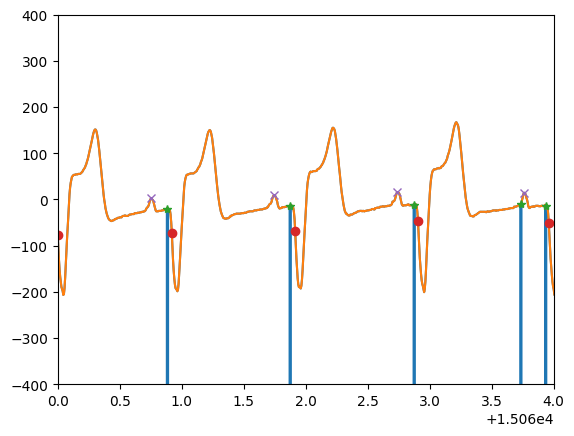

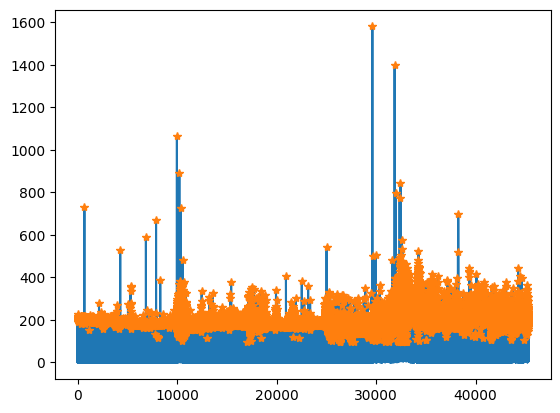

In [ ]:
place = 15060
plt.figure()
plt.plot(time, data_raw)
plt.plot(time, data_plot)
plt.plot(time[data_mask],data_plot[data_mask],"*")
plt.plot(time[qrs_mask],data_plot[qrs_mask],"o")
plt.plot(time[p_mask],data_plot[p_mask],"x")
plt.axis([place,place+4,-400, 400])

plt.figure()
plt.plot(time_pt, data_pt)
plt.plot(time_pt[qrs_mask[:-1]], data_pt[qrs_mask[:-1]],"*")
